## Installs

In [1]:
!sudo apt-get update && sudo apt-get install cmake libopenmpi-dev zlib1g-dev

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [93.1 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 https://developer.download.

In [2]:
!pip install stable-baselines[mpi]

     |████████████████████████████████| 256kB 2.6MB/s 
     |████████████████████████████████| 1.4MB 7.8MB/s 
  Created wheel for mpi4py: filename=mpi4py-3.0.3-cp36-cp36m-linux_x86_64.whl size=2074414 sha256=c355ead2caa5b84745fbc992880c28d7c517b5e720d8115636346dc55bc013a1
  Stored in directory: /root/.cache/pip/wheels/18/e0/86/2b713dd512199096012ceca61429e12b960888de59818871d6
Successfully built mpi4py


In [3]:
# Stable Baselines only supports tensorflow 1.x for now
%tensorflow_version 1.x
!apt-get install ffmpeg freeglut3-dev xvfb  # For visualization
!pip install stable-baselines[mpi]==2.10.0

TensorFlow 1.x selected.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
freeglut3-dev is already the newest version (2.8.1-3).
freeglut3-dev set to manually installed.
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 46 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,266 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.4 [784 kB]
Fetched 784 kB in 2s (380 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 144328 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.4_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.4) ..

In [4]:
import stable_baselines
stable_baselines.__version__

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



'2.10.0'

In [0]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip 

--2020-06-16 04:22:11--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.21.175.83, 52.6.123.150, 54.85.41.146, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.21.175.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  5.95MB/s    in 2.2s    

2020-06-16 04:22:14 (5.95 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


## Imports

In [0]:
import time
from collections import Counter

import gym
import numpy as np

In [0]:
from stable_baselines.common.policies import MlpPolicy

In [0]:
from stable_baselines.common.evaluation import evaluate_policy
from stable_baselines import DQN

In [0]:
from stable_baselines.common.callbacks import CheckpointCallback, EvalCallback
from stable_baselines import results_plotter

### Prepare video recording

In [0]:
# Set up fake display; otherwise rendering will fail
import os
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

In [0]:
import base64
from pathlib import Path

from IPython import display as ipythondisplay

def show_videos(video_path='', prefix=''):
  """
  Taken from https://github.com/eleurent/highway-env

  :param video_path: (str) Path to the folder containing videos
  :param prefix: (str) Filter the video, showing only the only starting with this prefix
  """
  html = []
  for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
      video_b64 = base64.b64encode(mp4.read_bytes())
      html.append('''<video alt="{}" autoplay 
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>'''.format(mp4, video_b64.decode('ascii')))
  ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

We will record a video using the [VecVideoRecorder](https://stable-baselines.readthedocs.io/en/master/guide/vec_envs.html#vecvideorecorder) wrapper, you will learn about those wrapper in the next notebook.

In [0]:
from stable_baselines.common.vec_env import VecVideoRecorder, DummyVecEnv

def record_video(env_id, model, video_length=500, prefix='', video_folder='videos/'):
  """
  :param env_id: (str)
  :param model: (RL model)
  :param video_length: (int)
  :param prefix: (str)
  :param video_folder: (str)
  """
  eval_env = DummyVecEnv([lambda: gym.make(env_id)])
  # Start the video at step=0 and record 500 steps
  eval_env = VecVideoRecorder(eval_env, video_folder=video_folder,
                              record_video_trigger=lambda step: step == 0, video_length=video_length,
                              name_prefix=prefix)

  obs = eval_env.reset()
  for _ in range(video_length):
    action, _ = model.predict(obs)
    obs, _, _, _ = eval_env.step(action)

  # Close the video recorder
  eval_env.close()

In [0]:
def actions_taken(model, num_episodes=10):
    """
    Evaluate a RL agent
    :param model: (BaseRLModel object) the RL Agent
    :param num_episodes: (int) number of episodes to evaluate it
    :return: (float) Mean reward for the last num_episodes
    """
    # This function will only work for a single Environment
    env = model.get_env()
    all_episode_rewards = []
    all_episode_actions = []
    for i in range(num_episodes):
        episode_rewards = []
        done = False
        obs = env.reset()
        while not done:
            # _states are only useful when using LSTM policies
            action, _states = model.predict(obs)
            # here, action, rewards and dones are arrays
            # because we are using vectorized env
            obs, reward, done, info = env.step(action)
            episode_rewards.append(reward)
            all_episode_actions.append(action)

        all_episode_rewards.append(sum(episode_rewards))

    mean_episode_reward = np.mean(all_episode_rewards)
    print("Mean reward:", mean_episode_reward, "Num episodes:", num_episodes)

    return all_episode_actions

In [0]:
os.makedirs('./models/', exist_ok=True)

## Train a Dueling DQN agent


In [0]:
from stable_baselines.common.cmd_util import make_vec_env
from stable_baselines.bench import Monitor

In [0]:
# Create log dir
log_dir = "./double_logs/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
env = gym.make('SpaceInvaders-ram-v0')
# Logs will be saved in log_dir/monitor.csv
env = Monitor(env, log_dir)

In [0]:
checkpoint_callback = CheckpointCallback(save_freq=5000, save_path=log_dir,
                                         name_prefix='double_dqn')
# Separate evaluation env
eval_env_callback = make_vec_env('SpaceInvaders-ram-v0', n_envs=1, monitor_dir=log_dir)
# Use deterministic actions for evaluation
eval_callback = EvalCallback(eval_env_callback, best_model_save_path=log_dir,
                             n_eval_episodes=20,
                             log_path=log_dir, eval_freq=10000,
                             deterministic=True, render=False)

In [0]:
learning_rate = 1e-4 #@param ["1e-3", "5e-4", "1e-4", "2e-4"] {type:"raw"}
exploration_final_eps = 0.05 #@param ["0.01", "0.02", "0.05", "0.1"] {type:"raw"}
gamma = 0.99 #@param ["0.999", "0.99", "0.9"] {type:"raw"}
exploration_fraction = 0.5 #@param ["0.1", "0.5", "0.9", "1.0"] {type:"raw"}
buffer_size = 10000 #@param ["10000", "50000", "100000"] {type: "raw"}
total_timesteps = 200000 #@param ["20000", "50000", "100000", "200000", "500000", "1000000"] {type:"raw"}
network = [128, 128] #@param ["[64, 64]", "[128, 128]", "[256, 256]", "[64, 64, 64]"] {type:"raw"}
seed = 42 #@param ["0", "42"] {type:"raw"}


In [0]:
# Activate only the prioritized replay
kwargs = {'double_q': True, 'prioritized_replay': False,
          'policy_kwargs': dict(dueling=False, layers=network)}

double_dqn = DQN('MlpPolicy', env,
               gamma=gamma,
               learning_rate=learning_rate,
               buffer_size=buffer_size,
               exploration_fraction=exploration_fraction,
               exploration_final_eps=exploration_final_eps,
               verbose=1,
               seed=seed,
               tensorboard_log="./double_space_invaders_ram_tensorboard/",
               **kwargs)

In [0]:
LOG_DIR = './double_space_invaders_ram_tensorboard/'

In [0]:
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [30]:
get_ipython().system_raw('./ngrok http 6006 &')

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://dccdf177b9b3.ngrok.io


In [31]:
# Use a separate environement for evaluation
eval_env = gym.make('SpaceInvaders-ram-v0')

# Random Agent, before training
mean_reward, std_reward = evaluate_policy(double_dqn, eval_env, n_eval_episodes=20)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:259.50 +/- 32.55


In [32]:
all_actions = actions_taken(double_dqn)
actions_counter = Counter(all_actions)
actions_counter

Mean reward: 240.0 Num episodes: 10


Counter({1: 8897, 4: 155})

In [0]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Before trained model actions dist')

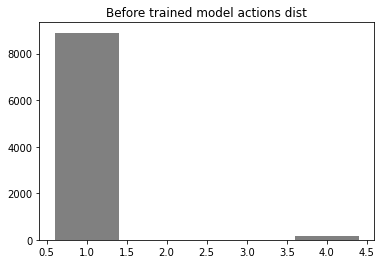

In [36]:
fig, ax = plt.subplots()
bars = ax.bar(actions_counter.keys(),
              actions_counter.values(), color='grey')
ax.set_title('Before trained model actions dist')

In [37]:
start = time.time()
double_dqn.learn(total_timesteps=total_timesteps,
               log_interval=10, tb_log_name='double_dqn_v9',
               callback=[checkpoint_callback, eval_callback])
print('Time in minutes: ' + str((time.time()-start)/60.0))
double_dqn.save("./models/double_dqn_ram_v9")

/usr/local/lib/python3.6/dist-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<Monitor<TimeLimit<AtariEnv<SpaceInvaders-ram-v0>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f4677b0f240>
  "{} != {}".format(self.training_env, self.eval_env))


--------------------------------------
| % time spent exploring  | 94       |
| episodes                | 10       |
| mean 100 episode reward | 130      |
| steps                   | 5344     |
--------------------------------------
Eval num_timesteps=10000, episode_reward=160.00 +/- 159.62
Episode length: 780.60 +/- 212.67
New best mean reward!
--------------------------------------
| % time spent exploring  | 88       |
| episodes                | 20       |
| mean 100 episode reward | 132      |
| steps                   | 11993    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 81       |
| episodes                | 30       |
| mean 100 episode reward | 159      |
| steps                   | 19788    |
--------------------------------------
Eval num_timesteps=20000, episode_reward=88.75 +/- 32.86
Episode length: 751.55 +/- 90.46
--------------------------------------
| % time spent exploring  | 74       |
| episodes     

In [38]:
# Use a separate environement for evaluation
eval_env = gym.make('SpaceInvaders-ram-v0')

# Random Agent, before training
mean_reward, std_reward = evaluate_policy(double_dqn, eval_env, n_eval_episodes=20)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:262.25 +/- 152.12


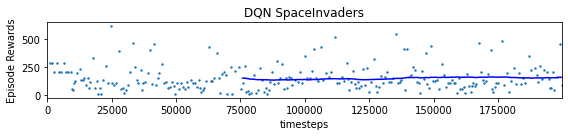

In [39]:
# Helper from the library
results_plotter.plot_results([log_dir], 2e5, results_plotter.X_TIMESTEPS,
                             "DQN SpaceInvaders")

In [40]:
record_video('SpaceInvaders-ram-v0', double_dqn, video_length=5000,
             prefix='double_dqn-SpaceInvaders-ram-v0')
show_videos(video_path='videos',
            prefix='double_dqn-SpaceInvaders-ram-v0')

Saving video to  /content/videos/double_dqn-SpaceInvaders-ram-v0-step-0-to-step-5000.mp4


In [41]:
all_actions = actions_taken(double_dqn)
actions_counter = Counter(all_actions)
actions_counter

Mean reward: 268.5 Num episodes: 10


Counter({0: 1913, 1: 842, 2: 21, 3: 487, 4: 5371, 5: 1})

Text(0.5, 1.0, 'Final trained model actions dist')

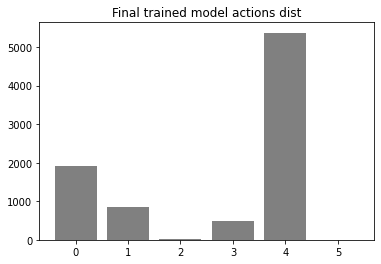

In [42]:
fig, ax = plt.subplots()
bars = ax.bar(actions_counter.keys(),
              actions_counter.values(), color='grey')
ax.set_title('Final trained model actions dist')

In [0]:
double_dqn.load_parameters("./double_logs/best_model.zip")

In [44]:
# Use a separate environement for evaluation
eval_env = gym.make('SpaceInvaders-ram-v0')

# Random Agent, before training
mean_reward, std_reward = evaluate_policy(double_dqn, eval_env, n_eval_episodes=20)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:228.50 +/- 150.61


In [45]:
# Use a separate environement for evaluation
eval_env = gym.make('SpaceInvaders-ram-v0')

# Random Agent, before training
mean_reward, std_reward = evaluate_policy(double_dqn, eval_env, n_eval_episodes=100)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:263.80 +/- 154.38


In [46]:
all_actions = actions_taken(double_dqn)
actions_counter = Counter(all_actions)
actions_counter

Mean reward: 308.5 Num episodes: 10


Counter({0: 324, 1: 375, 2: 27, 3: 97, 4: 2878, 5: 5886})

Text(0.5, 1.0, 'Best trained model actions dist')

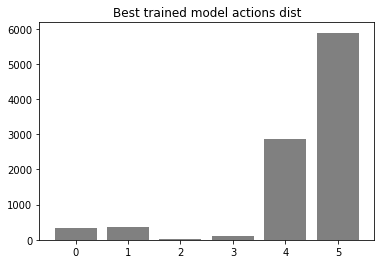

In [47]:
fig, ax = plt.subplots()
bars = ax.bar(actions_counter.keys(),
              actions_counter.values(), color='grey')
ax.set_title('Best trained model actions dist')

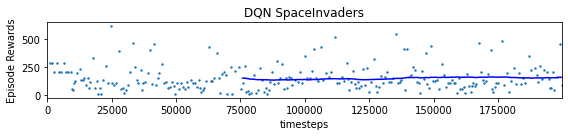

In [48]:
# Helper from the library
results_plotter.plot_results([log_dir], 2e5, results_plotter.X_TIMESTEPS,
                             "DQN SpaceInvaders")

In [49]:
record_video('SpaceInvaders-ram-v0', double_dqn, video_length=5000,
             prefix='double_dqn-SpaceInvaders-ram-v0')
show_videos(video_path='videos',
            prefix='double_dqn-SpaceInvaders-ram-v0')

Saving video to  /content/videos/double_dqn-SpaceInvaders-ram-v0-step-0-to-step-5000.mp4


This result is wierd that it because it didnt learn to move at all, but has learnt to kill very well.

This might be because of less training or less gamma value, so only maximize the short time reward and not worry about the long time reward

This result is wierd because every run I am getting the same score, 270.

The problem is it is always taking the same action.

Since the neural network is producing only one action every time, let us decrease 

In [54]:
ls

double_logs/                            ngrok*
double_space_invaders_ram_tensorboard/  ngrok-stable-linux-amd64.zip
drive/                                  sample_data/
models/                                 videos/


In [0]:
!mkdir -p drive/My\ Drive/RL_Project/Results/space_invaders_ram_v1/

In [0]:
!cp -r double_logs drive/My\ Drive/RL_Project/Results/space_invaders_ram_v1/double_logs

In [0]:
!cp -r double_space_invaders_ram_tensorboard/ drive/My\ Drive/RL_Project/Results/space_invaders_ram_v1/double_space_invaders_ram_tensorboard

In [0]:
!cp -r models/ drive/My\ Drive/RL_Project/Results/space_invaders_ram_v1/models/